In [1]:
import numpy as np
import pywt
import cv2  # Change from `cv` to `cv2`

def w2d(img, mode='haar', level=2):  # Increased the level from 1 to 2
    imArray = img
    # Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)
    # Instead of zeroing out the approximation coefficients completely, we can retain some information
    coeffs_H[0] *= 0.1  # Retain 10% of the approximation coefficients

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H


In [5]:
img =cv2.imread(r'C:\Users\ASUS\Desktop\VS code\ML-AI\Celebrity_Detection\data\kohli_main\download.jpeg')
arr=w2d(img)

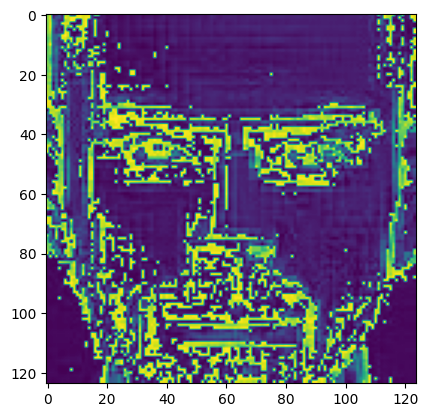

In [6]:
from matplotlib import pyplot as plt
plt.imshow(arr)

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [1]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

NameError: name 'celebrity_file_names_dict' is not defined